<a href="https://colab.research.google.com/github/cu-gwc-datascience/classes/blob/main/Week5_Geographic_DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 5: Geographic Data Visualization**

Girls Who Code @ Columbia

Class 3: Intro to Data Science

Week 5 curriculum by Yuxin Zhou (yz3062@columbia.edu) and Marina Gemma (meg2203@columbia.edu).

<img src="https://media0.giphy.com/media/QmHmjEwtbQtlkOx8T1/giphy.gif?cid=ecf05e47uy3ssc0fpvsh76y7fw6f3hwgu0sjst94f1d4nwgd&rid=giphy.gif&ct=g" width="300" height="300">

### **Label and save your notebooks**

1. Click on "Copy to Drive"


2. Rename your notebook "Week5_YourName.ipynb"

### Learning Objectives:

* Import geographic data
* Learn about various geographic projections
* Plot global temperature maps
* Plot NYC subway stations (points)
* Understand potential sources of distortion when working with spatial data
* Learn about the importance of exploring your dataset before analysis

## Putting data on a map

Geographical data are data that contain location information. Visualizing geographical data on a map can convey messages in a powerful way. 

Maps are everywhere. For example, the [NYTimes COVID tracking tool](https://www.nytimes.com/interactive/2021/us/new-york-city-new-york-covid-cases.html) shows hot spots of COVID positive cases on a county level, and readers can glean from it where COVID outbreaks are taking place. After looking at the map, you might choose to avoid areas with high COVID cases. When you go out, you might use **Google Maps** or **Apple Maps** to figure out how to get to where you want to go, and to get information on restaurants, coffee shops, or businesses in the immediate area. To find where your friends are, you might use **iPhone's Find My** app.

In Python, geographical data can be easily plotted. For a very long time, [basemap](https://basemaptutorial.readthedocs.io/en/latest/index.html) was the most popular map making option. Recently, basemap has been [deprecated](https://matplotlib.org/basemap/) and a new library called [**Cartopy**](https://scitools.org.uk/cartopy/docs/latest/index.html) has quickly caught up.

We will start by learning some basic usages of **Cartopy** (CARTOgraphic PYthon). Make sure you have the Cartopy library installed in the environment before carrying on. If you're not sure whether Cartopy is installed, run the next cell of code and see if you receive an error message. We will also import the other packages we will be using today:

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy.ma as ma
import numpy as np

#this sets a standard figure size
plt.rcParams['figure.figsize'] = (10,5)

In [ ]:
# if you get an error after running the cell above, un-comment the line below (remove the #) and then re-run the cell above
!pip install cartopy

## Cartopy basics

We will start by making a default world map (with no additional data overlay). 

On a normal matplotlib plot, the location of data is expressed by its `(x,y)` coordinates. In a Cartopy map, the location of a data point is expressed by its `(longitude, latitude)` coordinates. 

As a result, the first step of making a map is to select a [projection method](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html). Here, we use the default [Plate Carree](https://en.wikipedia.org/wiki/Equirectangular_projection) projection. This projection takes the **spherical map of the globe** and *translates* it to a **rectangular map**. The projection method takes the longitude and latitude coordinates and converts them into the coordinates of the figure. To assign the projection method, we add:

`projection=ccrs.PlateCarree()`
    
to the plotting command. The name `PlateCarree()` can be replaced with a [projection](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html) of your choosing.

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


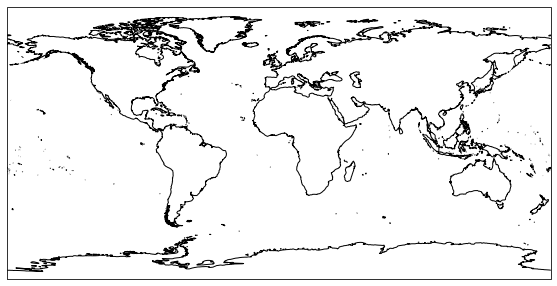

In [12]:
ax = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')

Voila! Two lines of code and we have a map.

The "ax" in the code above is just the name of your plot. You can name it whatever you want - try naming it "earth" instead:

In [ ]:
earth = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
earth.coastlines(resolution='50m')

The coastline resolution can be set to `110m`, `50m`, or `10m`. Try changing the resolution of the world map below. Do you see a difference?

In [ ]:
earth = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
earth.coastlines(resolution='your choice here')

An especially powerful feature of the Cartopy package is that it offers a large number of [projections](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html) to choose from. 

The **Robinson** projection has less "stretch" on the polar regions. As a result, compared to the **Plate Carree** projection, Greenland and Antarctica are closer to their real relative size in the **Robinson** projection.

Run the code below. Do Greenland and Antarctica look smaller or larger to you than they do in the Plate Carree projection?

In [ ]:
ax = plt.subplot(1,1,1,projection=ccrs.Robinson())
ax.coastlines(resolution='50m')

In [ ]:
# Do Greenland and Antarctica look smaller or larger to you?



Because the Earth is a sphere, in order to accurately display the relative sizes of continents and oceans, the surface needs to be split up like an orange peel, which we can visualize using the `InterruptedGoodeHomolosine()` projection (wow what a name!) below:

In [ ]:
ax = plt.subplot(1,1,1,projection=ccrs.InterruptedGoodeHomolosine())
ax.coastlines(resolution='50m')

This is kind of weird to look at, right? Though this is a realistic projection, it is not favored for global visualizations, since it doesn't make as much sense to our eye.

If we would like to plot Earth the same way an astronaunt may see Earth from space, we can choose the **orthographic** projection:

In [ ]:
ax = plt.subplot(1,1,1,projection=ccrs.Orthographic(central_latitude=40, central_longitude=-90))
ax.coastlines(resolution='50m')

This plots data on a sphere - since Earth is spherical, this another realistic Cartopy representation. However, it only allows you to view *one side* of the planet. That's why the `Robinson` and `Plate Carree` projections are favored when visualizing global data.

In general, the choice of projection depends on the type of information that needs to be conveyed via the map. No single projection is perfect for every scenario, and every projection has pros and cons. For example, in nautical maps, to make sure a ship is sailing from point A to point B in the shortest distance, the northing and easting on the map need to be straight. A Robinson projection, therefore, would not be the best choice.

Cartopy has functions to add more "flavors" to a map, including grid labels and outlines that mark the continents, oceans, and rivers. You can explore these features [here](https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html). The features can be easily added with the code:

    ax.add_feature(cfeature.LAND)
    
where `LAND` can be replaced with the other feature names. Browse the [features](https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html) and add a feature of your choice to the code below:

In [ ]:
ax = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
ax.gridlines(draw_labels=True)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)
# add another feature here

Lastly, a raster image that includes landscape on land and bathymetry in the ocean is included by Cartopy. To use this image, simply add this line of code:

    ax.stock_img()

In [ ]:
ax = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
# add the stock image to your map here

## Use Cartopy to plot climate data

Next, we will learn about using Cartopy to visualize **climate data**. Earth's climate has gone through cyclic changes for the past 800 thousand years, oscillating between glacial periods, where large amounts of ice covered North America and Northern Europe, and interglacial periods (which we are living in right now). You may have seen or heard of **Ice Age**, an animated movie set in the transition from a glacial to an interglacial period:

<img src="https://fffmovieposters.com/wp-content/uploads/73225.jpg" width="300" height="400">


The last time the Earth was in a glacial period was about 21 thousand years ago. As the name suggests, the last glacial period was colder and the concentration of carbon dioxide (CO$_2$), the greenhouse gas, was **lower** in the atmosphere than it is today.

Atmospheric CO$_2$ has been *increasing* since the start of Industrial Revolution, when the burning of coal and oil led to rapid release of CO$_2$ into the atmosphere. Given the projected increase in atmospheric CO$_2$ in the future if we continue to burn fossil fuels (coal, oil, natural gas), an important scientific question is ***how much warmer the Earth can/will become***. 

This is where information about the last glacial period can become useful. If we know the temperature of Earth during a period when CO$_2$ was lower than it is today, we may be able to use that information to calculate the temperature Earth might reach with CO$_2$ higher than today. This relationship between temperature and atmospheric CO$_2$ is called [climate sensitivity](https://climate.mit.edu/explainers/climate-sensitivity).

Here, we will explore a dataset published recently, called [Globally resolved surface temperatures since the Last Glacial Maximum](https://www.nature.com/articles/s41586-021-03984-4). In it, the scientists used a range of proxies (geological records that provide temperature information in times past) to produce a global map of temperature during the Last Glacial Maximum - the time when Earth was at its coolest and when the ice sheets at their largest extent during the last glacial period. 

First, we plot a map of **modern** sea surface temperature from the dataset. We will import the library `netCDF4` in order to read in the specialized data format.

**You will first need to download the dataset [here](https://www.ncei.noaa.gov/pub/data/paleo/reconstructions/osman2021/LGMR_SST_climo.nc)**.

Then, in Google Colab:

1. Click on the folder icon on the left hand side of your screen.
2. Click 'upload to session storage' and select the file you just downloaded. This will make the data available in Google Colab.

In [1]:
import netCDF4 as nc

# read in the netCDF data
dataset = nc.Dataset('LGMR_SST_climo.nc')

NetCDF is short for NET Climate Data Format.

The netCDF dataset includes the main variable of interest here, `sst`, which is short for **Sea Surface Temperature**. The `0` in the brackets below specifies that we are extracting the youngest (i.e. current day, or modern) **sst**:

In [ ]:
sst = dataset['sst'][0,:,:]

Next we will specify the latitude and longitude information. These are the coordinates where our variable `sst` lies:

In [ ]:
# This line reads the latitude information
lat = dataset['lat'][:,0]

# This line reads in longitude 
lon = ma.sort(dataset['lon'][0,:], axis=-1)

Because of some complexities of the longitude coordinates, we perform a numpy operation to simplify it (don't worry about this!)

Finally, we can make our plot of **sea surface temperature**. We will first set up our map using a `PlateCarree()` projection:
        
        ax1 = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
        
Then, we will plot ***contours***, or shaded areas that will represent temperature. We will name our contour `ct`, and in addition to the coordinates and the sea surface temperature inputs,
we also specify the projection the map is in (Plate Carree), and the maximum and minimum
values (`vmin=-2` and `vmax=30`) that correspond to the lightest and darkest colors:

In [ ]:
# We first set up the map using a Plate_Carree projection
ax1 = plt.subplot(1,1,1, projection=ccrs.PlateCarree())

#then plot the contour
ct = plt.contourf(lon, lat, sst, transform=ccrs.PlateCarree(),vmin=-2,vmax=30, cmap='Spectral_r')

# Take the handle (name) of the contour and plot a colorbar based on it
plt.colorbar(ct)

plt.title('Modern SST')

Now we have a plot of **modern** sea surface temperature (in degrees Celsius)!

You will notice that the SST is highest near the equator, and lowest near the poles. 

Next, we will plot the sea surface temperature *during the* ***Last Glacial Maximum***. We start again by setting up our projection:

    ax2 = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
    
and defining the variables we will plot:

    sst = dataset['sst'][-1,:,:]
    lat = dataset['lat'][:,0]
    lon = ma.sort(dataset['lon'][0,:], axis=-1)
    
The `-1` in the `sst` line extracts the oldest sst field in the dataset - the Last Glacial Maximum sst.

We will also specify the same `vmin` and `vmax` (`vmin=-2` and `vmax=30`) as the previous map, to make sure that the same colors represent the same temperature values. This makes it easier to compare the two maps even though they have (slightly) different temperature ranges.

In [ ]:
ax2 = plt.subplot(1,1,1, projection=ccrs.PlateCarree())

sst = dataset['sst'][-1,:,:]
lat = dataset['lat'][:,0]
lon = ma.sort(dataset['lon'][0,:], axis=-1)

ct = plt.contourf(lon, lat, sst, transform=ccrs.PlateCarree(),vmin=-2,vmax=30, cmap='Spectral_r')
plt.colorbar(ct)

plt.title('Last Glacial Maximum SST')

Compare and contrast the two plots above. What similarities and differences do you notice between the sea surface temperatures during the Last Glacial Maximum and today?

In [ ]:
#Your answer here

Additionally, we will use the following lines to plot the northern hemisphere ice sheet extent during the 
Last Glacial Maximum. Cartopy has functions to read in **shapefiles** (.shp). 

**You will first need to download the shapefile [here](https://github.com/cu-gwc-datascience/classes/blob/main/data/LGM_ice_sheet_extent.zip)**.

Then, in Google Colab:

1. Click on the folder icon on the left hand side of your screen.
2. Click 'upload to session storage' and select the file you just downloaded. This will make the data available in Google Colab.

In [ ]:
!unzip './LGM_ice_sheet_extent'

In [ ]:
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader

fname = 'LGM_ice_sheet_extent/LGM_best_estimate.shp'

# We specify that the ice sheet extent can be plotted in gray
shape_feature = ShapelyFeature(Reader(fname).geometries(),ccrs.PlateCarree(central_longitude=40), facecolor='gray')

#we make the same plot
ax2 = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
sst = dataset['sst'][-1,:,:]
lat = dataset['lat'][:,0]
lon = ma.sort(dataset['lon'][0,:], axis=-1)
ct = plt.contourf(lon, lat, sst, transform=ccrs.PlateCarree(),vmin=-2,vmax=30, cmap='Spectral_r')
plt.colorbar(ct)
plt.title('Last Glacial Maximum SST')

#and add the ice sheet extent
ax2.add_feature(shape_feature)

Do you see the gray area that was added? That was the ice sheet that existed during the Last Glacial Maximum! This ice sheet even covered New York City - you can see evidence of glacial movement in the rocks in Central Park!

Also, a fun fact: Long Island is actually a [terminal moraine](https://en.wikipedia.org/wiki/Moraine), which is an accumulation of rock and debris that is pushed along by the ice sheet as it moves, and was formed during the Last Glacial Maximum!

Comparing the two SST maps, we can see that the Last Glacial Maximum temperature was indeed cooler than the modern temperature. 

By how much cooler exactly? We can **subtract** the Last Glacial Maximum temperature from the modern sea surface temperature, and plot the difference to see the areas that experienced the most change:

In [ ]:
ax3 = plt.subplot(1,1,1, projection=ccrs.PlateCarree())

# subtract the Last Glacial Maximum temperature from the modern sea surface temperature:
sst = dataset['sst'][-1,:,:] - dataset['sst'][0,:,:]

ct = plt.contourf(lon, lat, sst, transform=ccrs.PlateCarree(),vmin=-12,vmax=2,cmap='viridis')
plt.colorbar(ct)
ax3.add_feature(shape_feature)

Notice the values on the colorbar - the majority are **negative**, meaning that the SST was **cooler** during the Last Glacial Maximum.

The largest cooling during the Last Glacial Maximum seems to have happened in the northern North Atlantic Ocean. The Southern Ocean (the ocean surrounding the Antarctica) and the Arctic Ocean saw the smallest cooling, and may have even been warmer in some limited regions.

Now, instead of plotting contours on a map, we are going to plot **points** on a map. 


# Plotting NYC Subway Stations



<img src="https://media2.giphy.com/media/4RjlgXp8uC0WRa1lf2/giphy.gif?cid=ecf05e4757vp5yjaolf4ufp6cbx0mxz31463if6qtrlgko15&rid=giphy.gif&ct=g" width="400" height="300">
 

We will be plotting all of NYC's subway stations on a map of NYC!

First, let's import the subway station data:

In [ ]:
stations = pd.read_csv('https://raw.githubusercontent.com/cu-gwc-datascience/classes/main/data/subway_stations.csv',index_col=None)
stations

We have the `name`, `borough`, `longitude`, and `latitude` for each subway station, as well as which lines (`subway_lines`) and how many lines (`number_of_lines`) stop at each station.

We will still be using **Cartopy** to plot, but need to import some additional packages:

In [4]:
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from PIL import Image

Now let's get started!

<img src='https://media1.giphy.com/media/3osxYdZN9vCr0l7AiY/giphy.gif?cid=ecf05e47u7w6nj4tjd8zg87n5yeamytp71gvgo3ve956gp5u&rid=giphy.gif&ct=g' width="400" height="300">

<img src='https://media4.giphy.com/media/xUA7aQfR9hhgU78KDC/giphy.gif?cid=ecf05e47k9hh73gkxq4yosjbrzp97qoxqwrj98ydxqjw51dw&rid=giphy.gif&ct=g' width="300" height="300">


We will set up our map in a similar way as we did for the SST plots above, but with a few differences. First, we are going to use a background image, which we will plot on top of. To load it, we will use the command:

    background = cimgt.Stamen('terrain-background')

We can set up our map using the lines below. The first line opens our figure and sets the size, and the second line specifys the Plate Carree projection we will be using:

    fig = plt.figure(figsize=(12,9))
    ax1 = plt.axes(projection=ccrs.PlateCarree()) 

Next, we will set the bounds of our image, using longitudes and latitudes of the greater NYC area, and add that to our plot:

    bounds = [-74.15,-73.699215,40.52,40.915568]
    ax1.set_extent(bounds)

Furthermore, to make the axes look nice, we can add a series of formatting commands:

> Set longitude and latitude indicators:
>>       ax1.set_xticks(np.linspace(bounds[0],bounds[1],6),crs=ccrs.PlateCarree()) 
>>       ax1.set_yticks(np.linspace(bounds[2],bounds[3],7)[1:],crs=ccrs.PlateCarree()) 
>
> Set axis formats:
>>       ax1.xaxis.set_major_formatter(lon_formatter) # set lons
>>       ax1.yaxis.set_major_formatter(lat_formatter) # set lats
>
> Set size of tick labels:
>>       ax1.xaxis.set_tick_params(labelsize=14)
>>       ax1.yaxis.set_tick_params(labelsize=14)

These formatting commands follow the example [here](https://makersportal.com/blog/2020/4/24/geographic-visualizations-in-python-with-cartopy), which plots weather stations instead of subway stations.

To add our background image, we include:

    ax1.add_image(background, int(scale))

where `scale` is a calculated value that scales our background image to the bounds that we set.

Combining all these gives us a nice map of the NYC area:

In [ ]:
background = cimgt.Stamen('terrain-background') # this loads the background image we will plot the stations on top of

fig = plt.figure(figsize=(12,9)) 
ax1 = plt.axes(projection=ccrs.PlateCarree()) 

bounds = [-74.15,-73.699215,40.52,40.915568] # NYC bounds
ax1.set_extent(bounds)

ax1.set_xticks(np.linspace(bounds[0],bounds[1],6),crs=ccrs.PlateCarree()) 
ax1.set_yticks(np.linspace(bounds[2],bounds[3],7)[1:],crs=ccrs.PlateCarree()) 
lon_formatter = LongitudeFormatter(number_format='0.1f',degree_symbol='',dateline_direction_label=True) # format lons
lat_formatter = LatitudeFormatter(number_format='0.1f',degree_symbol='') # format lats
ax1.xaxis.set_major_formatter(lon_formatter) 
ax1.yaxis.set_major_formatter(lat_formatter) 
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

scale = np.ceil(-np.sqrt(2)*np.log(np.divide((bounds[1]-bounds[0])/2.0,350.0))) # solve for scale based on set bounds
scale = (scale<20) and scale or 19 # scale cannot be larger than 19

ax1.add_image(background, int(scale)) # add background image scaled to bounds


In [ ]:
#If you get an error saying 'Geometry must be a point or a Linestring', uncomment and run the two commmands below:

#!pip uninstall -y shapely 
#!pip install shapely --no-binary shapely

#then try running the above cell again.

Neat! Now we want to plot the subway stations. To add them, we just need one line of code:

    ax1.plot(stations.longitude, stations.latitude, markersize=5,marker='o',linestyle='',color='dimgray',transform=ccrs.PlateCarree())
    
Here we plot the longitude (`stations.longitude`) and latitude (`stations.latitude`) from our data file `stations`, and set the `marker` shape, `markersize`, `color` and projection (`PlateCarree()`). 


In [ ]:
fig = plt.figure(figsize=(12,9)) 
ax1 = plt.axes(projection=ccrs.PlateCarree()) 

bounds = [-74.15,-73.699215,40.52,40.915568] # NYC bounds
ax1.set_extent(bounds)
ax1.set_xticks(np.linspace(bounds[0],bounds[1],6),crs=ccrs.PlateCarree()) 
ax1.set_yticks(np.linspace(bounds[2],bounds[3],7)[1:],crs=ccrs.PlateCarree()) 
ax1.xaxis.set_major_formatter(lon_formatter) 
ax1.yaxis.set_major_formatter(lat_formatter) 
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.add_image(background, int(scale)) # add background image scaled to bounds


#######################
#add stations to plot
ax1.plot(stations.longitude, stations.latitude, markersize=5,marker='o',linestyle='',color='dimgray',transform=ccrs.PlateCarree())

#add title to plot
ax1.set_title('MTA Subway Station Map',fontsize=16)


We have our stations! There are almost 500 subway stations in NYC, and they are represented on the map above.


What if we wanted to view only a subset of the stations, such as the stations only a certain subway line stops at? How about looking only at **B train** stations?

To do this, we would first need to find all of the stations in our dataset where the B train stops. We can do this by using a **filter**, which will find data points that meet your criteria (stations where the B train stops) and filters out the rest. the command to do this is:

    filterb = stations['subway_lines'].str.contains('b', case=False)
    
With this code, we are telling python to look at the `stations['subway_lines']` column in our dataset, and find rows that contain `b`. The `case=False` modifier tells python to look for both upper and lower case instances of `b`. The name `filterb` is arbitrary, and can be changed to whatever you'd like. Let's create this filter below:

In [ ]:
filterb = stations['subway_lines'].str.contains('b', case=False)
stations[filterb]

Plotting our subset of B train stations is easy. Instead of plotting `stations.longitude, stations.latitude` like we did above, we add the filter to the dataset, and plot `stations[filterb].longitude, stations[filterb].latitude`:

    ax1.plot(stations[mask].longitude, stations[mask].latitude,markersize=5,marker='o',linestyle='',color='darkorange',transform=ccrs.PlateCarree()
    
Part of data visualization and data science is making data relatable to viewers. The subway lines in NYC have associated colors, and the B train color is orange. We can color our B train subway stations orange (or any other color we'd like, though let's start with orange). Let's see what this looks like below:

In [ ]:
fig = plt.figure(figsize=(12,9)) 
ax1 = plt.axes(projection=ccrs.PlateCarree()) 

bounds = [-74.15,-73.699215,40.52,40.915568] # NYC bounds
ax1.set_extent(bounds)
ax1.set_xticks(np.linspace(bounds[0],bounds[1],6),crs=ccrs.PlateCarree()) 
ax1.set_yticks(np.linspace(bounds[2],bounds[3],7)[1:],crs=ccrs.PlateCarree()) 
ax1.xaxis.set_major_formatter(lon_formatter) 
ax1.yaxis.set_major_formatter(lat_formatter) 
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.add_image(background, int(scale)) # add background image scaled to bounds

#add filtered (B train) stations to plot
ax1.plot(stations[filterb].longitude, stations[filterb].latitude,markersize=5,marker='o',linestyle='',color='darkorange',transform=ccrs.PlateCarree())

#add title to plot        
ax1.set_title('B train Subway Stations',fontsize=16)

We can also create a filter that selects more than just one subway line! To do so, we just add `|` between our subway lines of interest (i.e., `'1|2|3'`):

In [ ]:
filter123 = stations['subway_lines'].str.contains('1|2|3', case=False)

Let's **plot the 1, 2, and 3** train stations and color them **red**:

In [ ]:
fig = plt.figure(figsize=(12,9)) 
ax1 = plt.axes(projection=ccrs.PlateCarree()) 

bounds = [-74.15,-73.699215,40.52,40.915568] # NYC bounds
ax1.set_extent(bounds)
ax1.set_xticks(np.linspace(bounds[0],bounds[1],6),crs=ccrs.PlateCarree()) 
ax1.set_yticks(np.linspace(bounds[2],bounds[3],7)[1:],crs=ccrs.PlateCarree()) 
ax1.xaxis.set_major_formatter(lon_formatter) 
ax1.yaxis.set_major_formatter(lat_formatter) 
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.add_image(background, int(scale)) # add background image scaled to bounds

#add filtered (1,2,3 train) stations to plot
ax1.plot(stations[filter123].longitude, stations[filter123].latitude,markersize=5,marker='o',linestyle='',color='red',transform=ccrs.PlateCarree())

#add title to plot        
ax1.set_title('1,2,3 train Subway Stations',fontsize=16)

Now it's your turn:

1. Create a filter that selects stations for either a single subway line (i.e. B train) or a set of subway lines (i.e. 1,2,3 trains). 

2. Plot your filtered subway stations, and color them according to the color of that subway line.

In [ ]:
#create your filter

In [ ]:
#plot your filtered subway stations

We can also plot multiple filters at once! All you need to do is add another plotting line to your figure:

In [ ]:
fig = plt.figure(figsize=(12,9)) 
ax1 = plt.axes(projection=ccrs.PlateCarree()) 

bounds = [-74.15,-73.699215,40.52,40.915568] # NYC bounds
ax1.set_extent(bounds)
ax1.set_xticks(np.linspace(bounds[0],bounds[1],6),crs=ccrs.PlateCarree()) 
ax1.set_yticks(np.linspace(bounds[2],bounds[3],7)[1:],crs=ccrs.PlateCarree()) 
ax1.xaxis.set_major_formatter(lon_formatter) 
ax1.yaxis.set_major_formatter(lat_formatter) 
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.add_image(background, int(scale)) # add background image scaled to bounds

#add filtered stations to plot
ax1.plot(stations[filterb].longitude, stations[filterb].latitude,markersize=5,marker='o',linestyle='',color='darkorange',transform=ccrs.PlateCarree())
ax1.plot(stations[filter123].longitude, stations[filter123].latitude,markersize=5,marker='o',linestyle='',color='red',transform=ccrs.PlateCarree())

#add title to plot        
ax1.set_title('B,1,2,3 train Subway Stations',fontsize=16)

In [ ]:
#try adding your filtered subway stations to the plot here!

We can even plot **all** the subway stations along with our colored ones. You just add the line of code that we used to plot them all above:

    ax1.plot(stations.longitude, stations.latitude, markersize=5,marker='o',linestyle='',color='dimgray',transform=ccrs.PlateCarree())

along with plotting our filtered stations.

> **HINT**: Plot all of the stations FIRST (colored in gray), so that our filtered stations (in color) can be seen!
    

In [ ]:
fig = plt.figure(figsize=(12,9)) 
ax1 = plt.axes(projection=ccrs.PlateCarree()) 

bounds = [-74.15,-73.699215,40.52,40.915568] # NYC bounds
ax1.set_extent(bounds)
ax1.set_xticks(np.linspace(bounds[0],bounds[1],6),crs=ccrs.PlateCarree()) 
ax1.set_yticks(np.linspace(bounds[2],bounds[3],7)[1:],crs=ccrs.PlateCarree()) 
ax1.xaxis.set_major_formatter(lon_formatter) 
ax1.yaxis.set_major_formatter(lat_formatter) 
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.add_image(background, int(scale)) # add background image scaled to bounds

#add all stations to plot
ax1.plot(stations.longitude, stations.latitude,markersize=5,marker='o',linestyle='',color='dimgray',transform=ccrs.PlateCarree())

#add filtered stations to plot
ax1.plot(stations[filterb].longitude, stations[filterb].latitude,markersize=5,marker='o',linestyle='',color='darkorange',transform=ccrs.PlateCarree())
ax1.plot(stations[filter123].longitude, stations[filter123].latitude,markersize=5,marker='o',linestyle='',color='red',transform=ccrs.PlateCarree())

#add title to plot        
ax1.set_title('All Subway Stations (B,1,2,3 trains in color)',fontsize=16)

Now, you try:

1. Create **another** filter that selects a different subway line or set of subway lines.
2. Pick a color for these filtered stations that matches the subway line color.
3. Plot all the subway stations in gray, as well as this set of subway stations in the color you picked and the set of stations from the filter you created above. 


In [ ]:
#create your filter

In [ ]:
#plot your two filters as well as all subway stations

Now for a challenge, if you're up for it!

There are **23** different subway lines in NYC:

    1,2,3,4,5,6,7,A,C,E,B,D,F,M,G,L,J,Z,N,Q,R,W,S
    
which can be grouped into:

    (1,2,3); (4,5,6); (7); (A,C,E); (B,D,F,M); (G); (L); (J,Z); (N,Q,R,W), (S)
    
Your task:

>    1. Create a filter for each one of these subway groups
>    2. Plot the groups on the same map (there are 10 groups, so you should have 10 lines of plotting commands).
>    3. Assign each group its own color (color choices [here](https://matplotlib.org/stable/gallery/color/named_colors.html)).
>    4. Voila! You have a color coded map of subway lines in NYC!

In [ ]:
#your plot here

## Time for some statistics...

We can do more than just plot the subway stations - we can do statistics on the dataset as well! For example, we can determine how many subway stations are in each borough. 

Let's find out how many stations are in Manhattan. We can do this by first creating a **filter** but instead of filtering by the `subway_lines` column, we will filter by the `borough` column:

In [ ]:
manhattan = stations['borough'].str.contains('manhattan', case=False)

We can then determine how many stations (rows) are in our filter by using `len()`:

In [ ]:
len(stations[manhattan])

There are **152** subway stations in Manhattan!

Now, determine how many subway stations are in **Brooklyn**:

In [ ]:
#find number of stations in Brookyln

How many stations are in **Queens**?

In [ ]:
#find number of stations in Queens

How about the **Bronx**?

In [ ]:
#find number of stations in the Bronx

Which borough has the **most** subway stations?

In [ ]:
#answer here

Remember, there are **23** different subway lines in NYC.

Let's find out which **station** has the most subway lines stopping at it:
> Hint: use `np.max()` to find the answer

In [ ]:
np.max(stations['number_of_lines'])

This gives us the **number** of subway lines that stop at the station, but not the station name itself. To find the name of the station, we can ask pandas to return the row where `stations['number_of_lines'] == 5`:

In [ ]:
stations[stations['number_of_lines'] == 5]

DeKalb Ave?? This doesn't sound right. I would've guessed that Times Square has the most subway lines. Let's check the data for Times Square.

Because we might not be sure of how Times Square is named in the data (might be upper case, lower case, have spaces, or have no spaces, etc.) we can create a filter like we did before, and find rows that have the word **times** in them:

In [ ]:
times_square = stations['name'].str.contains('times', case=False)
stations[times_square]

Woah! Times Square has **4 different entries** in our dataset! The MTA has a listing for the individual subway lines that stop at the station (i.e. the different platforms). 

This is why you always need to **explore your data**!!!!! We can't answer which subway station has the most subway lines without doing this. 

Now that we know Times Square is listed 4 times in our dataset, we can take the `number_of_lines` for each entry of Times Square in our filter `times_square` and `sum()` them:

In [ ]:
sum(stations[times_square]['number_of_lines'])

Times Square actually has 10 subways! This is more than DeKalb Ave, as we suspected. 

Now you try - find the actual number of lines at Atlantic Ave - Barclays station: 

>    1. Create a filter using the keyword 'barclay' (using atlantic would give you more stations than just the Barclay's Center station)
>    2. List the number of entries for your barclays filter (i.e. `stations[your_filter)_name]`)
>    3. Add up (`sum()`) the entries for Barclays Center to find the actual number of subway lines that stop there

In [ ]:
#create your filter and list the Barclays center entries


In [ ]:
#sum the number of lines to find the total


Which station has the most subway lines - **Times Square** or **Atlantic Ave/Barclay's Center**?

In [ ]:
# your answer here

If we hadn't explored the data more, we would have assumed that DeKalb Ave has the most subway lines. You'll see that many subway stations are repeated in the dataset. 

If you want to explore the data more, try:

>    1. Finding out how many duplicate stations there are, using `.duplicated()` (with examples [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html)).
>    2. Calculating the number of unique combinations of subway lines, using `np.unique()`
>    3. Determining the number of unique entries in a given column using `.value_counts()` (documentation is [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html)

In [ ]:
#explore more if you wish

## That's all for today!